In [30]:
from keras.datasets import reuters
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [31]:
'''
    Load train and test data
'''
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [32]:
'''
    Getting features into tensor from and one-hot-encoding the labels
'''
def vectorize_sequences(sequences, dim = 10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate (sequences):
        results[i, sequence] = 1
    return (results)  

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [33]:
'''
    Building the network architecture
'''
model = models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))



In [34]:
'''
    Specifying loss function and optimizer
'''
model.compile(optimizer = 'rmsprop', 
               loss = 'categorical_crossentropy', 
               metrics = ['accuracy'])

In [35]:
'''
    Split train into validation and train
'''
x_val = x_train[0:1000]
x_partial_train = x_train[1000:]
y_val = one_hot_train_labels[0:1000]
y_partial_train = one_hot_train_labels[1000:]

In [36]:
'''
    Training the model
'''
history = model.fit(x_partial_train, y_partial_train, epochs = 20, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 201us/step - loss: 2.5221 - accuracy: 0.5215 - val_loss: 1.7008 - val_accuracy: 0.6540
Epoch 2/20
7982/7982 [==============================] - 2s 200us/step - loss: 1.4030 - accuracy: 0.7056 - val_loss: 1.3064 - val_accuracy: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 175us/step - loss: 1.0546 - accuracy: 0.7746 - val_loss: 1.1344 - val_accuracy: 0.7560
Epoch 4/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.8317 - accuracy: 0.8222 - val_loss: 1.0422 - val_accuracy: 0.7780
Epoch 5/20
7982/7982 [==============================] - 1s 164us/step - loss: 0.6632 - accuracy: 0.8564 - val_loss: 0.9627 - val_accuracy: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.5281 - accuracy: 0.8900 - val_loss: 0.9409 - val_accuracy: 0.8000
Epoch 7/20
7982/7982 [==============================] - 1s 154us/step - loss

In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0.5, 1.0, 'Loss Vs Epoch for Training and Validation')

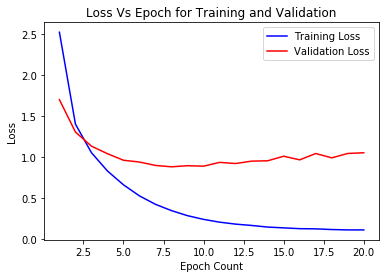

In [38]:
'''
    Plotting training and validation loss by epoch
'''
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epoch = np.arange(1, 21)
plt.plot(epoch, train_loss, 'b', label = 'Training Loss')
plt.plot(epoch, val_loss, 'r', label = 'Validation Loss')
plt.xlabel('Epoch Count')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Vs Epoch for Training and Validation')


Text(0.5, 1.0, 'Accuaracy Vs Epoch for Training and Validation')

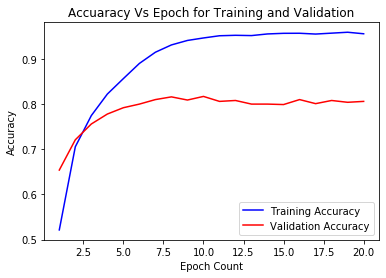

In [39]:
'''
    Plotting training and validation accuracy by epoch
'''
train_acc= history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epoch = np.arange(1, 21)
plt.plot(epoch, train_acc, 'b', label = 'Training Accuracy')
plt.plot(epoch, val_acc, 'r', label = 'Validation Accuracy')
plt.xlabel('Epoch Count')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuaracy Vs Epoch for Training and Validation')

In [47]:
'''
    Refitting model on whole training data with number of epochs as 
'''
model.fit(x_partial_train, y_partial_train, epochs = 9, batch_size=512)

Epoch 1/9
7982/7982 [==============================] - 1s 150us/step - loss: 0.0900 - accuracy: 0.9553
Epoch 2/9
7982/7982 [==============================] - 1s 164us/step - loss: 0.0847 - accuracy: 0.9578
Epoch 3/9
7982/7982 [==============================] - 1s 161us/step - loss: 0.0841 - accuracy: 0.9580
Epoch 4/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.0865 - accuracy: 0.9580
Epoch 5/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.0826 - accuracy: 0.9575
Epoch 6/9
7982/7982 [==============================] - 1s 142us/step - loss: 0.0826 - accuracy: 0.9574
Epoch 7/9
7982/7982 [==============================] - 1s 149us/step - loss: 0.0813 - accuracy: 0.9580
Epoch 8/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.0790 - accuracy: 0.9575
Epoch 9/9
7982/7982 [==============================] - 1s 166us/step - loss: 0.0807 - accuracy: 0.9588


In [48]:
'''
    Getting the result of the accuracy in the test set
'''
model.evaluate(x_test, one_hot_test_labels)


2246/2246 [==============================] - 0s 187us/step


[1.5806068754153706, 0.7782725095748901]